# 13.1 Phân tích dữ liệu file USA.gov

## 1. Nhập thư viện

In [29]:
import json
import pandas as pd
import matplotlib as plt
import seaborn as sns
import numpy as np

## 2. Đọc dữ liệu từ file example.txt và lưu trữ dưới dạng JSON

In [30]:
path = '/content/drive/MyDrive/Colab Notebooks/EDA/example.txt'
records = [json.loads(line) for line in open(path, encoding='utf-8')]
print(records[0])

{'a': 'Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKit/535.11 (KHTML, like Gecko) Chrome/17.0.963.78 Safari/535.11', 'c': 'US', 'nk': 1, 'tz': 'America/New_York', 'gr': 'MA', 'g': 'A6qOVH', 'h': 'wfLQtf', 'l': 'orofrog', 'al': 'en-US,en;q=0.8', 'hh': '1.usa.gov', 'r': 'http://www.facebook.com/l/7AQEFzjSi/1.usa.gov/wfLQtf', 'u': 'http://www.ncbi.nlm.nih.gov/pubmed/22415991', 't': 1331923247, 'hc': 1331822918, 'cy': 'Danvers', 'll': [42.576698, -70.954903]}


## 3. Tạo DataFrame từ danh sách records và đọc thông  tin dữ liệu

In [31]:
frame = pd.DataFrame(records)
# shape
print(f'+ Shape: {frame.shape}')
# types
print(f'+ Data Types: \n{frame.dtypes}')
# head, tail
print(f'+ Contents: ')
display(frame.head(5))
display(frame.tail(5))
# info
frame.info()
desc = frame.describe().T

+ Shape: (3560, 18)
+ Data Types: 
a               object
c               object
nk             float64
tz              object
gr              object
g               object
h               object
l               object
al              object
hh              object
r               object
u               object
t              float64
hc             float64
cy              object
ll              object
_heartbeat_    float64
kw              object
dtype: object
+ Contents: 


,a,c,nk,tz,gr,g,h,l,al,hh,r,u,t,hc,cy,ll,_heartbeat_,kw
0,Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...,US,1.0,America/New_York,MA,A6qOVH,wfLQtf,orofrog,"en-US,en;q=0.8",1.usa.gov,http://www.facebook.com/l/7AQEFzjSi/1.usa.gov/...,http://www.ncbi.nlm.nih.gov/pubmed/22415991,1.331923e+09,1.331823e+09,Danvers,"[42.576698, -70.954903]",NaN,NaN
1,GoogleMaps/RochesterNY,US,0.0,America/Denver,UT,mwszkS,mwszkS,bitly,NaN,j.mp,http://www.AwareMap.com/,http://www.monroecounty.gov/etc/911/rss.php,1.331923e+09,1.308262e+09,Provo,"[40.218102, -111.613297]",NaN,NaN
2,Mozilla/4.0 (compatible; MSIE 8.0; Windows NT ...,US,1.0,America/New_York,DC,xxr3Qb,xxr3Qb,bitly,en-US,1.usa.gov,http://t.co/03elZC4Q,http://boxer.senate.gov/en/press/releases/0316...,1.331923e+09,1.331920e+09,Washington,"[38.9007, -77.043098]",NaN,NaN
3,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_6_8)...,BR,0.0,America/Sao_Paulo,27,zCaLwp,zUtuOu,alelex88,pt-br,1.usa.gov,direct,http://apod.nasa.gov/apod/ap120312.html,1.331923e+09,1.331923e+09,Braz,"[-23.549999, -46.616699]",NaN,NaN
4,Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...,US,0.0,America/New_York,MA,9b6kNl,9b6kNl,bitly,"en-US,en;q=0.8",bit.ly,http://www.shrewsbury-ma.gov/selco/,http://www.shrewsbury-ma.gov/egov/gallery/1341...,1.331923e+09,1.273672e+09,Shrewsbury,"[42.286499, -71.714699]",NaN,NaN


,a,c,nk,tz,gr,g,h,l,al,hh,r,u,t,hc,cy,ll,_heartbeat_,kw
3555,Mozilla/4.0 (compatible; MSIE 9.0; Windows NT ...,US,1.0,America/New_York,NJ,e5SvKE,fqPSr9,tweetdeckapi,en,1.usa.gov,direct,http://www.fda.gov/AdvisoryCommittees/Committe...,1.331927e+09,1.301298e+09,Paramus,"[40.9445, -74.07]",NaN,NaN
3556,Mozilla/5.0 (Windows NT 5.1) AppleWebKit/535.1...,US,0.0,America/Chicago,OK,jQLtP4,jQLtP4,bitly,"en-US,en;q=0.8",1.usa.gov,http://www.facebook.com/l.php?u=http%3A%2F%2F1...,http://www.okc.gov/PublicNotificationSystem/Fo...,1.331927e+09,1.307530e+09,Oklahoma City,"[35.4715, -97.518997]",NaN,NaN
3557,GoogleMaps/RochesterNY,US,0.0,America/Denver,UT,mwszkS,mwszkS,bitly,NaN,j.mp,http://www.AwareMap.com/,http://www.monroecounty.gov/etc/911/rss.php,1.331927e+09,1.308262e+09,Provo,"[40.218102, -111.613297]",NaN,NaN
3558,GoogleProducer,US,0.0,America/Los_Angeles,CA,zjtI4X,zjtI4X,bitly,NaN,1.usa.gov,direct,http://www.ahrq.gov/qual/qitoolkit/,1.331927e+09,1.327529e+09,Mountain View,"[37.419201, -122.057404]",NaN,NaN
3559,Mozilla/4.0 (compatible; MSIE 8.0; Windows NT ...,US,0.0,America/New_York,VA,qxKrTK,qxKrTK,bitly,en-US,1.usa.gov,http://t.co/OEEEvwjU,http://herndon-va.gov/Content/public_safety/Pu...,1.331927e+09,1.312898e+09,Mc Lean,"[38.935799, -77.162102]",NaN,NaN


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3560 entries, 0 to 3559
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   a            3440 non-null   object 
 1   c            2919 non-null   object 
 2   nk           3440 non-null   float64
 3   tz           3440 non-null   object 
 4   gr           2919 non-null   object 
 5   g            3440 non-null   object 
 6   h            3440 non-null   object 
 7   l            3440 non-null   object 
 8   al           3094 non-null   object 
 9   hh           3440 non-null   object 
 10  r            3440 non-null   object 
 11  u            3440 non-null   object 
 12  t            3440 non-null   float64
 13  hc           3440 non-null   float64
 14  cy           2919 non-null   object 
 15  ll           2919 non-null   object 
 16  _heartbeat_  120 non-null    float64
 17  kw           93 non-null     object 
dtypes: float64(4), object(14)
memory usage: 500.8+ K

Có thể thấy dữ liệu có 3560 dòng và 18 cột:

| Tên trường      | Giải thích đầy đủ                                                                                                                                                                  |
| --------------- | ---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------- |
| **a**           | User-Agent của trình duyệt hoặc ứng dụng người dùng sử dụng khi click. Giúp xác định loại thiết bị (trình duyệt web, điện thoại, iPad, v.v.).                                      |
| **al**          | Danh sách ngôn ngữ (Accept-Language header) mà người dùng thiết lập trong trình duyệt, ví dụ “en-US,en;q=0.8”.                                                                     |
| **c**           | Mã quốc gia (country code) nơi click diễn ra, thường theo chuẩn ISO 3166-1 alpha-2 (ví dụ: `US` – Mỹ, `BR` – Brazil, `FR` – Pháp). Có thể null nếu không xác định được.            |
| **cy**          | Tên thành phố (city) được xác định theo IP của người click. Ví dụ: “Danvers”, “Washington”, “Venice”.                                                                              |
| **gr**          | Mã bang hoặc vùng (region code), thường chỉ xuất hiện khi `c` = “US” (ví dụ: “MA” – Massachusetts, “CA” – California).                                                             |
| **g**           | Mã rút gọn Bitly (global hash) — định danh chung cho một đường dẫn được rút gọn.                                                                                                   |
| **h**           | Mã rút gọn cụ thể (user hash) — có thể khác nhau nếu nhiều người dùng khác nhau rút gọn cùng một URL.                                                                              |
| **hh**          | Tên miền ngắn (hostname) của dịch vụ rút gọn, ví dụ: “1.usa.gov”, “bit.ly”, “j.mp”.                                                                                                |
| **l**           | Tên người dùng Bitly (login name) đã tạo đường dẫn rút gọn đó.                                                                                                                     |
| **nk**          | Một cờ boolean (0 hoặc 1) thể hiện việc có dùng cookie hay không (non-kookie). 1 nghĩa là người dùng có cookie, 0 là không.                                                        |
| **r**           | Referrer URL — trang web nơi người dùng click vào liên kết rút gọn (nguồn giới thiệu). Ví dụ: “[http://facebook.com/…”](http://facebook.com/…”) hoặc “direct” nếu click trực tiếp. |
| **tz**          | Múi giờ của người click (timezone), ví dụ: “America/New_York”, “Europe/London”, “Asia/Hong_Kong”.                                                                                  |
| **u**           | Đường dẫn đích thực tế mà liên kết rút gọn trỏ tới (long URL).                                                                                                                     |
| **t**           | Thời gian click (timestamp Unix tính bằng giây). Dạng số nguyên, có thể chuyển thành ngày giờ thật bằng `datetime.utcfromtimestamp()`.                                             |
| **hc**          | Thời gian tạo liên kết rút gọn (hash creation time) cũng ở dạng timestamp Unix.                                                                                                    |
| **ll**          | Danh sách tọa độ địa lý [vĩ độ (latitude), kinh độ (longitude)] của người click. Dữ liệu này giúp vẽ bản đồ phân bố click.                                                         |
| **kw**          | (Không phải bản ghi nào cũng có) – từ khóa (keyword) được gán cho link, đôi khi hiếm thấy trong log.                                                                               |
| ***heartbeat*** | Một loại bản ghi đặc biệt, không chứa thông tin click, chỉ nhằm giữ kết nối hoạt động. Thường được bỏ qua trong xử lý.                                                             |



## 4. Kiểm tra các giá trị timezone

In [32]:
time_zones = [rec["tz"] for rec in records if "tz" in rec]
print(time_zones)

['America/New_York', 'America/Denver', 'America/New_York', 'America/Sao_Paulo', 'America/New_York', 'America/New_York', 'Europe/Warsaw', '', '', '', 'America/Los_Angeles', 'America/New_York', 'America/New_York', 'America/New_York', 'Asia/Hong_Kong', 'Asia/Hong_Kong', 'America/New_York', 'America/Denver', 'Europe/Rome', 'Africa/Ceuta', 'America/New_York', 'America/New_York', 'America/New_York', 'Europe/Madrid', 'Asia/Kuala_Lumpur', 'Asia/Nicosia', 'America/Sao_Paulo', '', '', 'Europe/London', 'America/New_York', 'Pacific/Honolulu', 'America/Chicago', '', '', 'Pacific/Honolulu', '', 'America/New_York', 'America/New_York', 'America/New_York', 'America/Chicago', 'Europe/Rome', 'America/New_York', 'America/New_York', 'America/Los_Angeles', '', '', 'America/New_York', 'America/New_York', 'Europe/Malta', 'America/New_York', 'America/New_York', '', 'America/Los_Angeles', 'America/Sao_Paulo', '', 'Asia/Hong_Kong', 'Asia/Hong_Kong', 'Pacific/Honolulu', 'Pacific/Honolulu', 'Pacific/Honolulu', 'Am

Có thể thấy tồn tại những giá trị '' (giá trị rỗng) và những giá trị bị lặp lại nhiều lần.

## 5. Lập bảng kiểm tra tổng những giá trị lặp và rỗng

In [33]:
tz_counts = frame["tz"].value_counts()
tz_counts.head()

,count
tz,
America/New_York,1251
,521
America/Chicago,400
America/Los_Angeles,382
America/Denver,191


## 6. Thay thế giá trị rỗng

In [34]:
clean_tz = frame["tz"].fillna("Missing")
clean_tz[clean_tz == ""] = "Unknown"
tz_counts = clean_tz.value_counts()
tz_counts.head()

,count
tz,
America/New_York,1251
Unknown,521
America/Chicago,400
America/Los_Angeles,382
America/Denver,191


## 7. Bar Plot các giá trị

<Axes: ylabel='tz'>

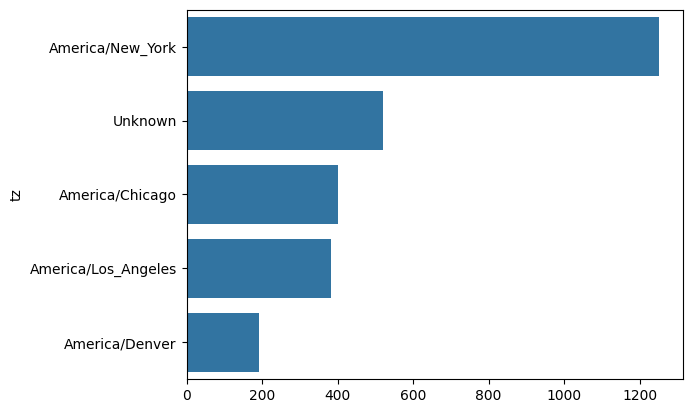

In [35]:
subset = tz_counts.head()
sns.barplot(y=subset.index, x=subset.to_numpy())

## 8. Kiểm tra các trình duyệt của người dùng

In [36]:
results = pd.Series([x.split()[0] for x in frame["a"].dropna()])
results.head(5)
results.value_counts().head(8)

,count
Mozilla/5.0,2594
Mozilla/4.0,601
GoogleMaps/RochesterNY,121
Opera/9.80,34
TEST_INTERNET_AGENT,24
GoogleProducer,21
Mozilla/6.0,5
BlackBerry8520/5.0.0.681,4


Kiểm tra 8 trình duyệt được dùng nhiều nhất, ta thấy có các trình duyệt khác nhau như Mozilla (3 phiên bản từ 4.0 đến 6.0), GoogleMaps,...

## 9. Phân tích dữ liệu dựa trên hệ điều hành (Windows và không phải Windows)

In [37]:
cframe = frame[frame["a"].notna()].copy()
cframe["os"] = np.where(cframe["a"].str.contains("Windows"),"Windows", "Not Windows")
cframe["os"].head(5)

,os
0,Windows
1,Not Windows
2,Windows
3,Not Windows
4,Windows


## 10. Đếm số lượng người dùng 2 loại hệ điều hành ở mỗi vùng khác nhau

In [38]:
by_tz_os = cframe.groupby(["tz", "os"])
agg_counts = by_tz_os.size().unstack().fillna(0)
agg_counts.head()

os,Not Windows,Windows
tz,,
,245.0,276.0
Africa/Cairo,0.0,3.0
Africa/Casablanca,0.0,1.0
Africa/Ceuta,0.0,2.0
Africa/Johannesburg,0.0,1.0


## 11. Kiểm tra timezones có nhiều lượt click nhất

Trả về chỉ số (index) của các múi giờ sắp xếp theo thứ tự tăng dần dựa trên giá trị tổng lượt click

In [39]:
indexer = agg_counts.sum("columns").argsort()
indexer.values[:10]

array([ 2,  7,  5,  4, 14, 11,  9,  8, 24, 26])

## 12. Lấy 10 múi giờ có nhiều lượt click nhất



In [40]:
count_subset = agg_counts.take(indexer[-10:])
count_subset

os,Not Windows,Windows
tz,,
America/Sao_Paulo,13.0,20.0
Europe/Madrid,16.0,19.0
Pacific/Honolulu,0.0,36.0
Asia/Tokyo,2.0,35.0
Europe/London,43.0,31.0
America/Denver,132.0,59.0
America/Los_Angeles,130.0,252.0
America/Chicago,115.0,285.0
,245.0,276.0


Các index được sắp xếp tăng dần, do đó, 10 múi giờ cuối cùng là 10 múi giờ có nhiều lượt click nhất

## 13. So sánh số lượng người dùng các hệ điều hành ở mỗi vùng

<Axes: xlabel='total', ylabel='tz'>

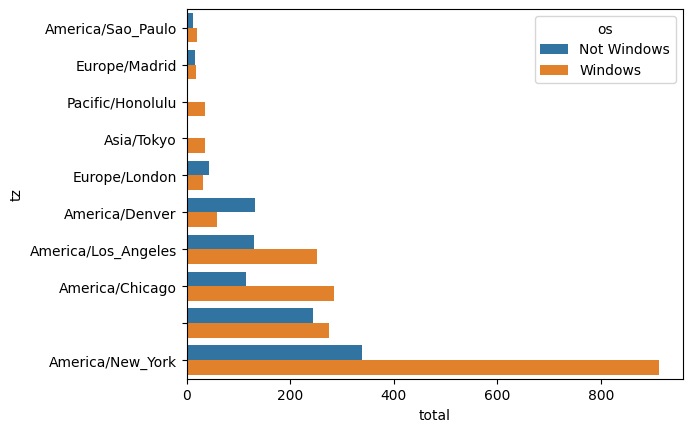

In [41]:
count_subset = count_subset.stack()
count_subset.name = "total"
count_subset = count_subset.reset_index()
count_subset.head(10)
sns.barplot(x="total", y="tz", hue="os", data=count_subset)

Thể hiện được sự chênh lệch trong sử dụng giữa các hệ điều hành ở mỗi vùng khác nhau qua bảng trên

## 14. Tạo bảng so sánh theo tỉ lệ sử dụng trên thang 1.0

In [42]:
def norm_total(group):
  group["normed_total"] = group["total"] / group["total"].sum()
  return group
results = count_subset.groupby("tz").apply(norm_total, include_groups=False)

<Axes: xlabel='normed_total', ylabel='tz'>

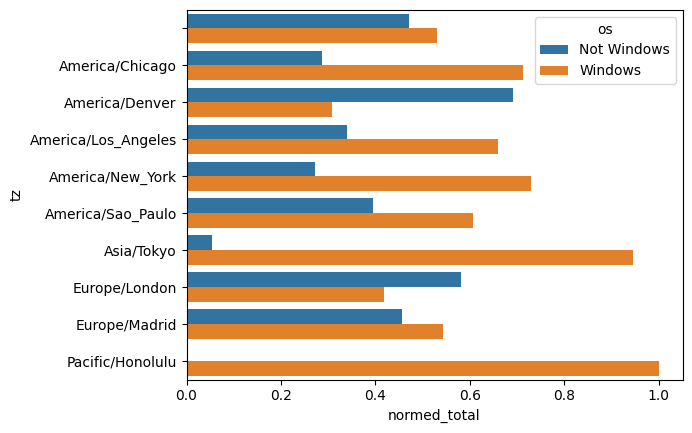

In [43]:
sns.barplot(x="normed_total", y="tz", hue="os", data=results)

Tại đây có thể dễ dàng theo dõi tỉ lệ giữa mỗi hệ điều hành